This script contains a small function to remove participant names from text. The function is called remove_name.

To run this function, it requires using spacy's language model. The first couple of code blocks first install spacy and then download the large language model 

# New Section

In [126]:
!pip install --upgrade spacy

[link text](https://)

In [127]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.4 MB 7.0 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [128]:
import spacy

In [129]:
nlp1 = spacy.load("en_core_web_lg")

In [130]:
def remove_name(text,nlp = spacy.load("en_core_web_lg"), debug=False):
    # nlp = spacy.load("en_core_web_lg")

    doc = nlp(text)
    
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON" or  ent.label_ == "GPE" or ent.label_ == "ORG"] 
    # print(names)  

    if names:
        new_txt = text
        for name in names:
            new_txt = new_txt.replace(name, "")
            if(debug):
              print(new_txt)
        
        return new_txt, names
    
    else:
        return text, names


In [131]:
test_txt = "Dr. Katz is an okay teacher for the class at Virginia Tech in Virginia. Alaa Abdalla was working on RSAP data. Yasir Gamieldien was working on SPOT. Matt Norris was working on Abeesee data. Maya Menon is working on environmental sustainability publication data. Isil Anakok is a person! Umair Shakir is working with interview data. Abe Alsharif is working on sentiment analysis. Allison Godwin is joining during her sabbatical."

test_txt_3 = "Umair Shakir is also sitting in the class."


In [132]:
test_2 = "The Easter egg and ham sandwich from Jordan was pretty okay."
doc = nlp1(test_2)

In [133]:
for token in doc:
  print(token.text)
  print(token.pos_)

for ent in doc.ents:
  print(ent.text)
  print(ent.label_)

The
DET
Easter
PROPN
egg
NOUN
and
CCONJ
ham
NOUN
sandwich
NOUN
from
ADP
Jordan
PROPN
was
AUX
pretty
ADV
okay
ADJ
.
PUNCT
Jordan
GPE


In [134]:
remove_name(test_txt_3,nlp1)

(' is also sitting in the class.', ['Umair Shakir'])

In [135]:
test_txt_2 = "Andrew is an okay teacher for the class. Alaa was working on RSAP data. Yasir was working on SPOT. Matt was working on Abeesee data. Maya is working on environmental sustainability publication data. Isil is running the SLR. Umair is working with interview data. Abe is working on sentiment analysis. Allison is joining during her sabbatical."


In [136]:
remove_name(test_txt,nlp1)

('Dr.  is an okay teacher for the class at  in .  was working on RSAP data.  was working on SPOT.  was working on  data.  is working on environmental sustainability publication data.  is a person!  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['Katz',
  'Virginia Tech',
  'Virginia',
  'Alaa Abdalla',
  'Yasir Gamieldien',
  'Matt Norris',
  'Abeesee',
  'Maya Menon',
  'Isil Anakok',
  'Umair Shakir',
  'Abe Alsharif',
  'Allison Godwin'])

In [137]:
remove_name(test_txt.lower(),nlp1)

('dr.  is an okay teacher for the class at  tech in .  was working on rsap data.  gamieldien was working on spot.  was working on abeesee data.  is working on environmental sustainability publication data.  is a person! umair  is working with interview data. abe alsharif is working on sentiment analysis.  is joining during her sabbatical.',
 ['katz',
  'virginia',
  'alaa abdalla',
  'yasir',
  'matt norris',
  'maya menon',
  'isil anakok',
  'shakir',
  'allison godwin'])

In [138]:
remove_name(test_txt_2,nlp1)

(' is an okay teacher for the class.  was working on RSAP data.  was working on SPOT.  was working on  data.  is working on environmental sustainability publication data.  is running the .  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['Andrew',
  'Alaa',
  'Yasir',
  'Matt',
  'Abeesee',
  'Maya',
  'Isil',
  'SLR',
  'Umair',
  'Abe',
  'Allison'])

In [139]:
remove_name(test_txt_2.lower(),nlp1)

('andrew is an okay teacher for the class.  was working on rsap data.  was working on spot.  was working on esee data. maya is working on environmental sustainability publication data.  is running the .  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['alaa', 'yasir', 'matt', 'isil', 'slr', 'umair', 'abe', 'allison'])

Now, we consider working with "en_core_web_trf" instead of "en_core_web_lg"
This format uses GPU, added the same to our runtime. 

In [140]:
!python -m spacy download en_core_web_trf
# We need to install spacy-transformers for web_trf or else it will give dependencies issue. 
!pip install spacy-transformers
import spacy_transformers

nlp2 = spacy.load('en_core_web_trf')

     |████████████████████████████████| 460.2 MB 35 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [141]:
!python -m spacy download en_core_web_md
nlp3 = spacy.load('en_core_web_md')

     |████████████████████████████████| 45.7 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [142]:
!python -m spacy download en_core_web_sm
nlp4 = spacy.load('en_core_web_sm')

     |████████████████████████████████| 13.9 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [143]:
remove_name(test_txt,nlp1)

('Dr.  is an okay teacher for the class at  in .  was working on RSAP data.  was working on SPOT.  was working on  data.  is working on environmental sustainability publication data.  is a person!  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['Katz',
  'Virginia Tech',
  'Virginia',
  'Alaa Abdalla',
  'Yasir Gamieldien',
  'Matt Norris',
  'Abeesee',
  'Maya Menon',
  'Isil Anakok',
  'Umair Shakir',
  'Abe Alsharif',
  'Allison Godwin'])

In [144]:
remove_name(test_txt,nlp2)

('Dr.  is an okay teacher for the class at  in .  was working on RSAP data.  was working on SPOT.  was working on  data.  is working on environmental sustainability publication data.  is a person!  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['Katz',
  'Virginia Tech',
  'Virginia',
  'Alaa Abdalla',
  'Yasir Gamieldien',
  'Matt Norris',
  'Abeesee',
  'Maya Menon',
  'Isil Anakok',
  'Umair Shakir',
  'Abe Alsharif',
  'Allison Godwin'])

In [145]:
remove_name(test_txt.lower(),nlp1)

('dr.  is an okay teacher for the class at  tech in .  was working on rsap data.  gamieldien was working on spot.  was working on abeesee data.  is working on environmental sustainability publication data.  is a person! umair  is working with interview data. abe alsharif is working on sentiment analysis.  is joining during her sabbatical.',
 ['katz',
  'virginia',
  'alaa abdalla',
  'yasir',
  'matt norris',
  'maya menon',
  'isil anakok',
  'shakir',
  'allison godwin'])

In [146]:
remove_name(test_txt.lower(),nlp2)

('dr.  is an okay teacher for the class at  in .  was working on  data.  was working on spot.  was working on  data.  is working on  data.  is a person!  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['katz',
  'virginia tech',
  'virginia',
  'alaa abdalla',
  'rsap',
  'yasir gamieldien',
  'matt norris',
  'abeesee',
  'maya menon',
  'environmental sustainability publication',
  'isil anakok',
  'umair shakir',
  'abe alsharif',
  'allison godwin'])

In [147]:
remove_name(test_txt_2,nlp1)

(' is an okay teacher for the class.  was working on RSAP data.  was working on SPOT.  was working on  data.  is working on environmental sustainability publication data.  is running the .  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['Andrew',
  'Alaa',
  'Yasir',
  'Matt',
  'Abeesee',
  'Maya',
  'Isil',
  'SLR',
  'Umair',
  'Abe',
  'Allison'])

In [148]:
remove_name(test_txt_2,nlp2)

(' is an okay teacher for the class.  was working on RSAP data.  was working on SPOT.  was working on  data.  is working on environmental sustainability publication data.  is running the SLR.  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['Andrew',
  'Alaa',
  'Yasir',
  'Matt',
  'Abeesee',
  'Maya',
  'Isil',
  'Umair',
  'Abe',
  'Allison'])

In [149]:
remove_name(test_txt_2.lower(),nlp1)

('andrew is an okay teacher for the class.  was working on rsap data.  was working on spot.  was working on esee data. maya is working on environmental sustainability publication data.  is running the .  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['alaa', 'yasir', 'matt', 'isil', 'slr', 'umair', 'abe', 'allison'])

In [150]:
remove_name(test_txt_2.lower(),nlp2)

(' is an okay teacher for the class.  was working on rsap data.  was working on spot.  was working on  data.  is working on  data.  is running the slr.  is working with interview data.  is working on sentiment analysis.  is joining during her sabbatical.',
 ['andrew',
  'alaa',
  'yasir',
  'matt',
  'abeesee',
  'maya',
  'environmental sustainability publication',
  'isil',
  'umair',
  'abe',
  'allison'])

In [151]:
# global_names = ['Andrew', 'Alaa', 'Yasir', 'Matt', 'Abeesee', 'Maya', 'Isil', 'Umair', 'Abe', 'Allison',]

import re

try:
  import names
except ImportError:
  %pip install names
  import names

try:
  from essential_generators import DocumentGenerator as DG
except ImportError:
  %pip install essential_generators
  from essential_generators import DocumentGenerator as DG
genDG = DG()


try:
  from wonderwords import RandomWord, Defaults, random_sentence
except ImportError:
  %pip install wonderwords
  from wonderwords import RandomWord, Defaults, random_sentence

genWW = RandomWord(noun=Defaults.NOUNS, verb=Defaults.VERBS, adjective=Defaults.ADJECTIVES)
genWS = random_sentence.RandomSentence()

In [187]:
global_names = [names.get_first_name() for i in range(20)]
global_names

['Nick',
 'Robert',
 'Laura',
 'Alvin',
 'Sara',
 'Meghan',
 'Craig',
 'Alex',
 'Maude',
 'Rhonda',
 'Juan',
 'Edith',
 'Karen',
 'Edwin',
 'Shirley',
 'Kathleen',
 'Richard',
 'David',
 'Althea',
 'John']

In [188]:
global_sent = [genWS.sentence() for i in range(20)]
global_sent

['The lyrical embellishment turns overview.',
 'The volatile ginger begins fatigue.',
 'The nebulous professional shuts forager.',
 'The handsomely cure precedes architecture.',
 'The blushing goldfish pecks whey.',
 'The silent goodness marches sandal.',
 'The silent printing wishes cappelletti.',
 'The slow sister dreams ratio.',
 'The shy temptress stamps twist.',
 'The squealing chemotaxis attracts odometer.',
 'The tasty range moves burst.',
 'The agonizing mustard complains scotch.',
 'The magenta offering strips arrow.',
 'The fantastic factory screams thunderhead.',
 'The abiding steel sneaks venison.',
 'The light spray adapts sheet.',
 'The hospitable spoon researches integer.',
 'The maniacal heart relaxes isolation.',
 'The loving stallion thanks shipyard.',
 'The brave upstairs twists guilt.']

In [189]:
# Credit - https://github.com/andrewrgarcia/youtube-andrew/blob/master/sentgen.py

import random
import numpy as np

def alg(N=5):
    
    str1=[names.get_first_name() for i in range(20)]
    str2=['enthusiastic','active','efficient','archaic']
    str3=['boy','cat','computer','machine']
    str4=['eats','chases','makes','produces']
    str5=['chocolate','mice','calculations','tools']
    
    #Vstr=[str1,str2,str3,str4,str5]
    block1=random.choice(str1,N)
    block2=random.choice(str2,N)
    block3=random.choice(str3,N)
    block4=random.choice(str4,N)
    block5=random.choice(str5,N)
    #sentgroup=np.zeros(N)
    #for i in range(0,N):
    #    sentgroup[i] = random.choice(str1)+' '+random.choice(str2)+' '+random.choice(str3)+' '+random.choice(str4)
    sentce=np.zeros(N)
    for i in range(0,N):
        sentce[i]=block1[i]+' '+block2[i]+' '+block3[i]+' '+block4[i]+' '+block5[i]

        
        #sentce[ = random.choice(str1)+' '+random.choice(str2)+' '+random.choice(str3)+' '+random.choice(str4)+' '+random.choice(str5)
        #sentce2 = random.choice(str1)+' '+random.choice(str2)+' '+random.choice(str3)+' '+random.choice(str4)+' '+random.choice(str5)
    
    return sentce

In [190]:
name_sent = ''
for i in range(len(global_sent)):
  s = global_sent[i]
  n = global_names[i]
  name_sent += s.replace('The', n) + ' '
name_sent
pre_list = []
acc_list = []
rec_list = []
f1_list = []

def acc_and_prec(newtxt, detect_names):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  # words = newtxt.replace('.', '')
  words = re.split("[ .,?!'\";:-]+", newtxt)
  for n in detect_names:
    if n in global_names:
      tp += 1
    else:
      fp += 1

  for w in words:
    if w in global_names:
      fn += 1
    else:
      tn += 1

  print(tp, tn, fp, fn)

  pre = tp/(tp + fp)
  # rec = tp/(tp + fn)
  acc = (tp + tn)/(tp + tn + fp + fn)
  print("Acc Pre Rec")
  print(acc, pre, rec)
  print(detect_names)

In [191]:
# tp = 0
# fp = 0
# tn = 0
# fn = 0

# newtxt, detect_names = remove_name(name_sent)
# print(len(detect_names)/len(global_names))

# print(newtxt)
# words = newtxt.replace('.', '').split(' ')
# for n in detect_names:
#   if n in global_names:
#     tp += 1
#   else:
#     fp += 1

# for w in words:
#   if w in global_names:
#     fn += 1
#   else:
#     tn += 1

# print(tp, tn, fp, fn)

# pre = tp/(tp + fp)
# # rec = tp/(tp + fn)
# acc = (tp + tn)/(tp + tn + fp + fn)
# print(acc, pre, rec)
# acc_list.append(acc)
# rec_list.append(rec)
# pre_list.append(pre)
newtxt, detect_names = remove_name(name_sent)
acc_and_prec(newtxt, detect_names)

17 80 1 2
Acc Pre Rec
0.97 0.9444444444444444 1.0
['Nick', 'Robert volatile ginger', 'Laura', 'Alvin', 'Sara', 'Meghan', 'Craig', 'Alex', 'Maude', 'Rhonda', 'Juan', 'Edith', 'Karen', 'Edwin', 'Shirley', 'Kathleen', 'Richard', 'Althea']


In [192]:
# tp = 0
# fp = 0
# tn = 0
# fn = 0

# newtxt, detect_names = remove_name(name_sent, nlp=nlp2)
# print(len(detect_names)/len(global_names))

# print(newtxt)
# words = newtxt.replace('.', '').split(' ')
# for n in detect_names:
#   if n in global_names:
#     tp += 1
#   else:
#     fp += 1

# for w in words:
#   if w in global_names:
#     fn += 1
#   else:
#     tn += 1

# print(tp, tn, fp, fn)

# pre = tp/(tp + fp)
# # rec = tp/(tp + fn)
# acc = (tp + tn)/(tp + tn + fp + fn)
# print(acc, pre, rec)
# acc_list.append(acc)
# rec_list.append(rec)
# pre_list.append(pre)
newtxt, detect_names = remove_name(name_sent, nlp=nlp2)
acc_and_prec(newtxt, detect_names)

20 82 0 0
Acc Pre Rec
1.0 1.0 1.0
['Nick', 'Robert', 'Laura', 'Alvin', 'Sara', 'Meghan', 'Craig', 'Alex', 'Maude', 'Rhonda', 'Juan', 'Edith', 'Karen', 'Edwin', 'Shirley', 'Kathleen', 'Richard', 'David', 'Althea', 'John']


In [193]:
# tp = 0
# fp = 0
# tn = 0
# fn = 0

# newtxt, detect_names = remove_name(name_sent.lower(), nlp=nlp2)
# print(len(detect_names)/len(global_names))
# words = newtxt.replace('.', '').split(' ')

# print(newtxt)

# for n in detect_names:
#   if n in global_names:
#     tp += 1
#   else:
#     fp += 1

# for w in words:
#   if w in global_names:
#     fn += 1
#   else:
#     tn += 1

# print(tp, tn, fp, fn)

# pre = tp/(tp + fp)
# # rec = tp/(tp + fn)
# acc = (tp + tn)/(tp + tn + fp + fn)
# print(acc, pre, rec)
# acc_list.append(acc)
# rec_list.append(rec)
# pre_list.append(pre)

newtxt, detect_names = remove_name(name_sent.lower())
acc_and_prec(newtxt, detect_names)

0 77 16 0
Acc Pre Rec
0.8279569892473119 0.0 1.0
['nick lyrical embellishment', 'robert volatile ginger', 'laura', 'alvin', 'sara', 'meghan', 'craig', 'alex', 'rhonda', 'juan', 'edith', 'karen magenta', 'shirley', 'kathleen light', 'richard hospitable spoon researches', 'althea']


In [194]:
# tp = 0
# fp = 0
# tn = 0
# fn = 0

# newtxt, detect_names = remove_name(name_sent.lower())
# print(len(detect_names)/len(global_names))
# words = newtxt.replace('.', '').split(' ')

# print(newtxt)

# for n in detect_names:
#   if n in global_names:
#     tp += 1
#   else:
#     fp += 1

# for w in words:
#   if w in global_names:
#     fn += 1
#   else:
#     tn += 1

# print(tp, tn, fp, fn)

# pre = tp/(tp + fp)
# # rec = tp/(tp + fn)
# acc = (tp + tn)/(tp + tn + fp + fn)
# print(acc, pre, rec)
# acc_list.append(acc)
# rec_list.append(rec)
# pre_list.append(pre)

newtxt, detect_names = remove_name(name_sent.lower(), nlp=nlp2)
acc_and_prec(newtxt, detect_names)

0 57 26 0
Acc Pre Rec
0.6867469879518072 0.0 1.0
['nick', 'robert', 'laura nebulous professional', 'forager', 'alvin', 'sara', 'meghan silent goodness', 'sandal', 'craig silent printing', 'alex slow sister', 'maude', 'rhonda', 'juan', 'edith', 'scotch', 'karen magenta', 'arrow', 'edwin fantastic factory', 'shirley abiding steel', 'kathleen light spray', 'richard hospitable spoon', 'integer', 'david', 'althea', 'thanks shipyard', 'john brave']


In [195]:
newtxt, detect_names = remove_name(name_sent, nlp=nlp3)
acc_and_prec(newtxt, detect_names)

18 81 1 1
Acc Pre Rec
0.9801980198019802 0.9473684210526315 1.0
['Nick', 'Robert', 'Laura', 'Alvin', 'Sara', 'Meghan', 'Craig', 'Alex', 'Maude', 'Rhonda', 'Juan', 'Edith', 'Karen', 'Edwin', 'Shirley', 'Kathleen', 'Richard', 'Althea', 'John brave']


In [196]:
newtxt, detect_names = remove_name(name_sent.lower(), nlp=nlp3)
acc_and_prec(newtxt, detect_names)

0 76 17 0
Acc Pre Rec
0.8172043010752689 0.0 1.0
['nick lyrical', 'robert', 'laura', 'alvin', 'craig', 'alex', 'maude', 'rhonda', 'juan tasty range', 'edith', 'karen magenta', 'edwin', 'shirley abiding steel', 'kathleen light spray', 'richard', 'althea', 'john brave']


In [197]:
newtxt, detect_names = remove_name(name_sent, nlp=nlp4)
acc_and_prec(newtxt, detect_names)

9 81 0 11
Acc Pre Rec
0.8910891089108911 1.0 1.0
['Laura', 'Meghan', 'Craig', 'Rhonda', 'Edwin', 'Shirley', 'Kathleen', 'Richard', 'Althea']


In [198]:
newtxt, detect_names = remove_name(name_sent.lower(), nlp=nlp4)
acc_and_prec(newtxt, detect_names)

0 75 14 0
Acc Pre Rec
0.8426966292134831 0.0 1.0
['nick lyrical embellishment', 'robert volatile', 'meghan silent', 'craig silent', 'alex slow', 'rhonda', 'juan tasty', 'karen magenta', 'edwin fantastic', 'kathleen light spray', 'richard', 'david maniacal', 'althea', 'john brave']


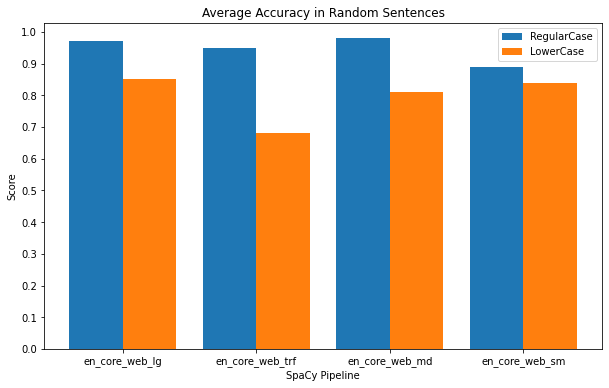

In [213]:
import matplotlib.pyplot as plt
labels = ['en_core_web_lg', 'en_core_web_trf', 'en_core_web_md', 'en_core_web_sm']
acc_1 = [0.97, 0.95, 0.98, 0.89]
pre_1 = [0.89, 0.93, 0.94, 0.88]
acc_2 = [0.85, 0.68, 0.81, 0.84]
pre_2 = [0.50, 0.44, 0.44, 0.53]

X_axis = np.arange(len(labels))

plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, acc_1, 0.4, label='RegularCase')
plt.bar(X_axis+0.2, acc_2, 0.4, label='LowerCase')

plt.xticks(X_axis, labels)
plt.yticks(np.arange(0, 21, 2)/20)
plt.ylabel("Score")
plt.xlabel("SpaCy Pipeline")
plt.title("Average Accuracy in Random Sentences")
plt.legend()
plt.show()

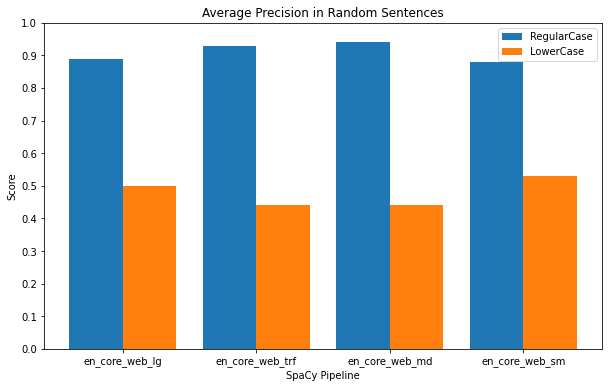

In [214]:
plt.figure(figsize=(10,6))
plt.bar(X_axis-0.2, pre_1, 0.4, label='RegularCase')
plt.bar(X_axis+0.2, pre_2, 0.4, label='LowerCase')

plt.xticks(X_axis, labels)
plt.yticks(np.arange(0, 21, 2)/20)
plt.ylabel("Score")
plt.xlabel("SpaCy Pipeline")
plt.title("Average Precision in Random Sentences")
plt.legend()
plt.show()